In [1]:
import numpy as py
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.layers import LayerNormalization
import tensorflow as tf
import time
start_time = time.time()

In [2]:
df = pd.read_csv('truths.csv')
df
#dataset
#ds = dataset.to_numpy()
ds = pd.read_csv('a1dataset.csv')


In [3]:
dataset = df.values
dataset

array([[43, 41, 42, ..., 73, 77,  1],
       [42, 42, 41, ..., 73, 78,  1],
       [44, 40, 43, ..., 74, 77,  1],
       ...,
       [40, 38, 39, ..., 72, 72,  0],
       [40, 39, 39, ..., 72, 72,  0],
       [40, 37, 40, ..., 72, 72,  0]])

In [4]:
X = dataset[:,0:135]
Y = dataset[:,136]

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_scale


array([[0.47222222, 0.44444444, 0.45945946, ..., 0.45454545, 0.51219512,
        0.43181818],
       [0.44444444, 0.5       , 0.43243243, ..., 0.47727273, 0.51219512,
        0.43181818],
       [0.5       , 0.38888889, 0.48648649, ..., 0.47727273, 0.51219512,
        0.45454545],
       ...,
       [0.38888889, 0.27777778, 0.37837838, ..., 0.43181818, 0.36585366,
        0.40909091],
       [0.38888889, 0.33333333, 0.37837838, ..., 0.45454545, 0.36585366,
        0.40909091],
       [0.38888889, 0.22222222, 0.40540541, ..., 0.45454545, 0.36585366,
        0.40909091]])

In [7]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [8]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=1)

In [9]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(5912, 135) (2534, 135) (1, 135) (5912,) (2534,) (1,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([ Dense(32, activation='leaky_relu', input_shape=(135,)), Dense(32, activation='leaky_relu'), Dense(1, activation='sigmoid'), ])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_val, Y_val))

2022-03-30 17:53:53.335020: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
93/93 [==============================] - 1s 4ms/step - loss: 0.5828 - accuracy: 0.6905 - val_loss: 0.4868 - val_accuracy: 0.7735
Epoch 2/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.7941 - val_loss: 0.3925 - val_accuracy: 0.8106
Epoch 3/10
93/93 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8204 - val_loss: 0.3227 - val_accuracy: 0.8362
Epoch 4/10
93/93 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8466 - val_loss: 0.2764 - val_accuracy: 0.8706
Epoch 5/10
93/93 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.8865 - val_loss: 0.2442 - val_accuracy: 0.8875
Epoch 6/10
93/93 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9230 - val_loss: 0.2011 - val_accuracy: 0.9290
Epoch 7/10
93/93 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9523 - val_loss: 0.1556 - val_accuracy: 0.9546
Epoch 8/10
93/93 [==

In [11]:
print(model.evaluate(X_train,Y_train)[1]*100,"%")
#100.0% accuracy 20k epochs
#96.43835425376892% accuracy 10k epochs
#91.78082346916199% accuracy 2k epochs
#92.05479621887207% accuracy 1k epochs
#84.93150472640991% accuracy 100 epochs
#52.054792642593384% accuracy 10 epochs

185/185 [==============================] - 0s 956us/step - loss: 0.0824 - accuracy: 0.9756
97.5642740726471 %


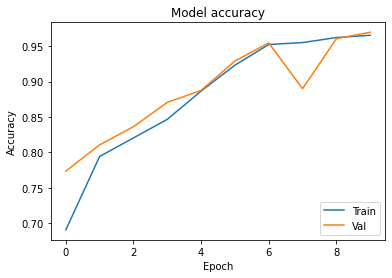

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
from keras.layers import Dropout
from keras import regularizers
reg = Sequential([
    Dense(64, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(135,)),
    Dropout(0.3),
    Dense(64, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
reg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hreg = reg.fit(X_train, Y_train,
          batch_size=64, epochs=10,
          validation_data=(X_val, Y_val))


Epoch 1/10
93/93 [==============================] - 1s 3ms/step - loss: 2.3366 - accuracy: 0.7202 - val_loss: 1.4375 - val_accuracy: 0.7869
Epoch 2/10
93/93 [==============================] - 0s 2ms/step - loss: 1.0677 - accuracy: 0.8090 - val_loss: 0.7845 - val_accuracy: 0.8244
Epoch 3/10
93/93 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.8182 - val_loss: 0.5984 - val_accuracy: 0.8200
Epoch 4/10
93/93 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.8256 - val_loss: 0.5229 - val_accuracy: 0.8536
Epoch 5/10
93/93 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8270 - val_loss: 0.5176 - val_accuracy: 0.8125
Epoch 6/10
93/93 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.8298 - val_loss: 0.4781 - val_accuracy: 0.8441
Epoch 7/10
93/93 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8346 - val_loss: 0.4565 - val_accuracy: 0.8658
Epoch 8/10
93/93 [==

In [14]:
print(reg.evaluate(X_train,Y_train)[1]*100,"%")

185/185 [==============================] - 0s 894us/step - loss: 0.4446 - accuracy: 0.8520
85.19959449768066 %


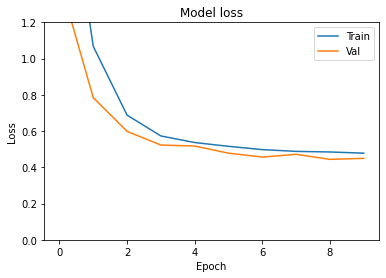

In [15]:
plt.plot(hreg.history['loss'])
plt.plot(hreg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [16]:
print("%s" % (time.time() - start_time))

7.973205089569092


In [39]:


y_pred_test = reg.predict(X)

In [43]:
y_pred_test

Y_train



array([0, 0, 0, ..., 0, 0, 0])